In [29]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
import pandas as pd

In [12]:
dh = spark.read.csv('Data/HoneybeeDataAllCtgAllTime.csv', header=True, inferSchema=True)
dh.show()

+-------+----+--------------+-----------+---------+----------+----------+-----------+----------------+------+-----------+--------+------+--------------+---------+---------+--------------------+------+---------------+--------+------+
|Program|Year|        Period|Week Ending|Geo Level|     State|State ANSI|Ag District|Ag District Code|County|County ANSI|Zip Code|Region|watershed_code|Watershed|Commodity|           Data Item|Domain|Domain Category|   Value|CV (%)|
+-------+----+--------------+-----------+---------+----------+----------+-----------+----------------+------+-----------+--------+------+--------------+---------+---------+--------------------+------+---------------+--------+------+
| SURVEY|2020|MARKETING YEAR|       null|    STATE|   ALABAMA|         1|       null|            null|  null|       null|    null|  null|             0|     null|    HONEY|HONEY - PRODUCTIO...| TOTAL|  NOT SPECIFIED| 1482000|  null|
| SURVEY|2020|MARKETING YEAR|       null|    STATE|   ALABAMA|      

In [13]:
print((dh.count(), len(dh.columns)))

(19429, 21)


In [20]:
dh.printSchema()

root
 |-- Program: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Period: string (nullable = true)
 |-- Week Ending: string (nullable = true)
 |-- Geo Level: string (nullable = true)
 |-- State: string (nullable = true)
 |-- State ANSI: integer (nullable = true)
 |-- Ag District: string (nullable = true)
 |-- Ag District Code: string (nullable = true)
 |-- County: string (nullable = true)
 |-- County ANSI: string (nullable = true)
 |-- Zip Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- watershed_code: integer (nullable = true)
 |-- Watershed: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Data Item: string (nullable = true)
 |-- Domain: string (nullable = true)
 |-- Domain Category: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- CV (%): string (nullable = true)



AxesSubplot(0.125,0.125;0.775x0.755)


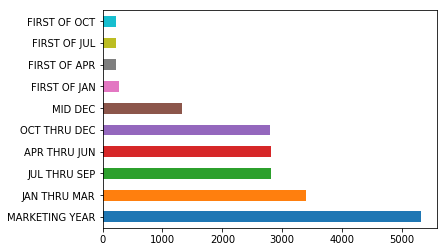

In [50]:
dh_pd = pd.read_csv('Data/HoneybeeDataAllCtgAllTime.csv')

dh_hist = dh_pd['Period'].value_counts().plot(kind = 'barh')
print(dh_hist)

AxesSubplot(0.125,0.125;0.775x0.755)


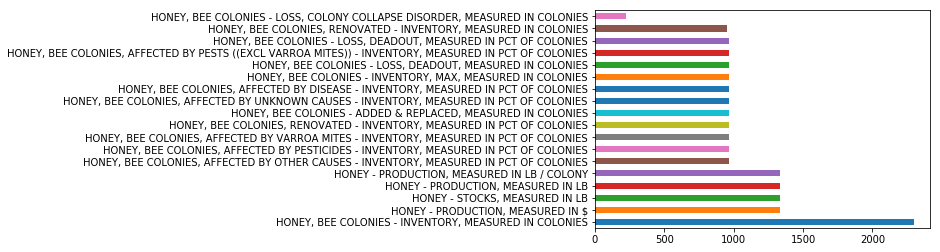

In [36]:
dupditem = dh_pd['Data Item'].value_counts().plot(kind = 'barh')
print(dupditem)

In [51]:
#field names
col_name =  pd.DataFrame(
    columns=['Field']
    )
                        
for row in list(dh_pd.columns):
    col_name.loc[row] = row

#Prints data types
data_types = pd.DataFrame(dh_pd.dtypes, columns=['Data Type'])



#Prints missing data
missing_data = pd.DataFrame(
    dh_pd.isnull().sum(),
    columns=['Missing']
)

#unique values
unique_values = pd.DataFrame(
    columns=['Unique']
)
for row in list(dh_pd.columns.values):
    unique_values.loc[row] = [dh_pd[row].nunique()]


# finds max and min
maximum_values = pd.DataFrame(
    columns=['Max']
)
for row in list(dh_pd.columns.values):
    maximum_values.loc[row] = [dh_pd[row].max()]

min_values = pd.DataFrame(
    columns=['Min']
)
for row in list(dh_pd.columns.values):
    min_values.loc[row] = [dh_pd[row].min()]
    


dq_report = col_name.join(data_types).join(missing_data).join(unique_values).join(min_values).join(maximum_values)
print(dq_report)

                             Field Data Type  Missing Unique  \
Program                    Program    object        0      1   
Year                          Year     int64        0     31   
Period                      Period    object        0     10   
Week Ending            Week Ending   float64    19429      0   
Geo Level                Geo Level    object        0      1   
State                        State    object        0     50   
State ANSI              State ANSI   float64      426     49   
Ag District            Ag District   float64    19429      0   
Ag District Code  Ag District Code   float64    19429      0   
County                      County   float64    19429      0   
County ANSI            County ANSI   float64    19429      0   
Zip Code                  Zip Code   float64    19429      0   
Region                      Region   float64    19429      0   
watershed_code      watershed_code     int64        0      1   
Watershed                Watershed   flo

In [37]:
drop = ["Program","Week Ending","Geo Level","Ag District","Ag District Code",
        "County","County ANSI","Zip Code","Zip Code","Region","watershed_code",
        "Watershed","CV (%)","Commodity","Domain","Domain Category"]
dh_pd.drop(drop, inplace=True, axis=1)

dh_pd.to_csv("Data/FirstCleanData.csv", index=False)

In [39]:
hbc = pd.read_csv("Data/FirstCleanData.csv")
hbc1 = hbc.drop(hbc[(hbc["Data Item"] != 'HONEY - PRODUCTION, MEASURED IN LB') & (hbc["Data Item"] != 'HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES')].index)
hbc1 = hbc1.drop(hbc1[(hbc1["Period"] != 'MARKETING YEAR')].index)
print(hbc1)
hbc1.to_csv("Data/SecCleanData.csv", index=False)

       Year          Period           State  State ANSI  \
1      2020  MARKETING YEAR         ALABAMA         1.0   
3      2020  MARKETING YEAR         ALABAMA         1.0   
5      2020  MARKETING YEAR          ARIONA         4.0   
7      2020  MARKETING YEAR          ARIONA         4.0   
9      2020  MARKETING YEAR        ARKANSAS         5.0   
11     2020  MARKETING YEAR        ARKANSAS         5.0   
13     2020  MARKETING YEAR      CALIFORNIA         6.0   
15     2020  MARKETING YEAR      CALIFORNIA         6.0   
17     2020  MARKETING YEAR        COLORADO         8.0   
19     2020  MARKETING YEAR        COLORADO         8.0   
21     2020  MARKETING YEAR         FLORIDA        12.0   
23     2020  MARKETING YEAR         FLORIDA        12.0   
25     2020  MARKETING YEAR         GEORGIA        13.0   
27     2020  MARKETING YEAR         GEORGIA        13.0   
29     2020  MARKETING YEAR          HAWAII        15.0   
31     2020  MARKETING YEAR          HAWAII        15.0 

In [41]:
hbc1 = pd.read_csv("Data/SecCleanData.csv")
pd.to_numeric(hbc1['Value'])
hbc2 = hbc1.pivot_table(index='Year', columns='Data Item', values='Value', aggfunc=np.sum)
print(hbc2)
hbc2.to_csv("Data/FinalCleanData.csv", index=True)

Data Item  HONEY - PRODUCTION, MEASURED IN LB  \
Year                                            
1990                                198611000   
1991                                221025000   
1992                                221658000   
1993                                230664000   
1994                                218057000   
1995                                211165000   
1996                                199569000   
1997                                196437000   
1998                                220527000   
1999                                203068000   
2000                                220286000   
2001                                186051000   
2002                                171718000   
2003                                181724000   
2004                                183494000   
2005                                174614000   
2006                                154910000   
2007                                148341000   
2008                

In [44]:
Q1 = hbc2.quantile(0.25)
Q3 = hbc2.quantile(0.75)
IQR = Q3 - Q1
((hbc2 < (Q1 - 1.5 * IQR)) | (hbc2 > (Q3 + 1.5 * IQR))).sum()

Data Item
HONEY - PRODUCTION, MEASURED IN LB                       0
HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES    2
dtype: int64

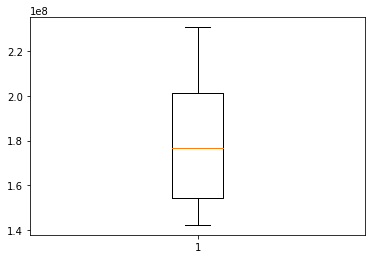

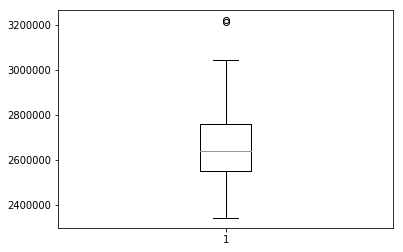

In [45]:
plt.boxplot(hbc2["HONEY - PRODUCTION, MEASURED IN LB"])
plt.show()
plt.boxplot(hbc2["HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES"])
plt.show()